## Homework 1 Cybersecurity
* Sebastián Navarro 00321588
* Eduardo Guerrero 00326712
* Mateo Pozo

## Exercise 2
Prove that if a cryptosystem has perfect secrecy and |K|= |C|= |P|, then every ciphertext is equally probable.

## Exercise 3
Suppose that APNDJI or XYGROBO are ciphertexts that are obtained from encryption using the Shift Cipher. Show in each case that there are two "meaningful" plaintexts that could encrypt to the given ciphertext. 

In [4]:
# Shift Cipher
def shift_cipher_forward(text, shift):
    result = ""
    for i in range(len(text)):
        char = text[i]
        if char.isupper():
            result += chr((ord(char) + shift - 65) % 26 + 65)
        else:
            result += chr((ord(char) + shift - 97) % 26 + 97)
    return result

def shift_cipher_backward(text, shift):
    result = ""
    for i in range(len(text)):
        char = text[i]
        if char.isupper():
            result += chr((ord(char) - shift - 65) % 26 + 65)
        else:
            result += chr((ord(char) - shift - 97) % 26 + 97)
    return result

def brute_force(text):
    print("Forward:")
    for i in range(1, 26):
        print(f"Shift {i}: {shift_cipher_forward(text, i)}")

In [5]:
cypher_text = "APNDJI"
brute_force(cypher_text)

Forward:
Shift 1: BQOEKJ
Shift 2: CRPFLK
Shift 3: DSQGML
Shift 4: ETRHNM
Shift 5: FUSION
Shift 6: GVTJPO
Shift 7: HWUKQP
Shift 8: IXVLRQ
Shift 9: JYWMSR
Shift 10: KZXNTS
Shift 11: LAYOUT
Shift 12: MBZPVU
Shift 13: NCAQWV
Shift 14: ODBRXW
Shift 15: PECSYX
Shift 16: QFDTZY
Shift 17: RGEUAZ
Shift 18: SHFVBA
Shift 19: TIGWCB
Shift 20: UJHXDC
Shift 21: VKIYED
Shift 22: WLJZFE
Shift 23: XMKAGF
Shift 24: YNLBHG
Shift 25: ZOMCIH


The two "meaningful" plaintexts that can be identified in the case of the ciphertext APNDJI are:

* Shift 5: FUSION
* Shift 11: LAYOUT

In [6]:
cypher_text = "XYGROBO"
brute_force(cypher_text)

Forward:
Shift 1: YZHSPCP
Shift 2: ZAITQDQ
Shift 3: ABJURER
Shift 4: BCKVSFS
Shift 5: CDLWTGT
Shift 6: DEMXUHU
Shift 7: EFNYVIV
Shift 8: FGOZWJW
Shift 9: GHPAXKX
Shift 10: HIQBYLY
Shift 11: IJRCZMZ
Shift 12: JKSDANA
Shift 13: KLTEBOB
Shift 14: LMUFCPC
Shift 15: MNVGDQD
Shift 16: NOWHERE
Shift 17: OPXIFSF
Shift 18: PQYJGTG
Shift 19: QRZKHUH
Shift 20: RSALIVI
Shift 21: STBMJWJ
Shift 22: TUCNKXK
Shift 23: UVDOLYL
Shift 24: VWEPMZM
Shift 25: WXFQNAN


The two "meaningful" plaintexts that can be identified in the case of the ciphertext XYGROBO are:

* Shift 3: ADJURER
* Shift 16: NOWHERE

## Exercise 4
Compute H(K|C) and H(K|P, C) for the Affine Cipher, assuming that keys are used equiprobably and the plaintexts are equiprobable.

## Exercise 5.1
Substitution Cipher:

EMGLOSUDCGDNCUSWYSFHNSFCYKDPUMLWGYICOXYSIPJCKQPKUGKMGOLICGINCGACKSNISACYKZSCKXECJCKSHYSXCGOIDPKZCNKSHICGIWYGKKGKGOLDSILKGOIUSIGLEDSPWZUGFZCCNDGYYSFUSZCNXEOJNCGYEOWEUPXEZGACGNFGLKNSACIGOIYCKXCJUCIUZCFZCCNDGYYSFEUEKUZCSOCFZCCNCIACZEJNCSHFZEJZEGMXCYHCJUMGKUCY

Function for frequency analysis and Fitness score implementing letter, bigram and trigram frequency and To replace letters

**Note:** In this function, the lower the score, the better

In [1]:
import matplotlib.pyplot as plt
from collections import Counter

def frequency_analysis(cipher_text):
    # Remove non-alphabetic characters and convert to lowercase
    cipher_text = ''.join(filter(str.isalpha, cipher_text)).lower()
    
    # Count the frequency of each letter
    frequency = Counter(cipher_text)
    
    # Sort letters by frequency
    sorted_frequency = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))

    # Create a bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_frequency.keys(), sorted_frequency.values(), color='blue')
    plt.xlabel('Letters')
    plt.ylabel('Frequency')
    plt.title('Frequency Analysis of Cipher Text')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

def bigram_frequency_analysis(cipher_text):
    # Clean the text: remove non-alphabetic characters and convert to uppercase
    clean_text = ''.join(filter(str.isalpha, cipher_text)).upper()
    
    # Create bigrams
    bigrams = [clean_text[i:i+2] for i in range(len(clean_text) - 1)]
    
    # Count frequency of each bigram
    frequency = Counter(bigrams)
    
    # Get the 5 most common bigrams
    most_common_bigrams = frequency.most_common(5)

    # Prepare data for plotting
    labels, counts = zip(*most_common_bigrams)
    
    # Create a bar graph
    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts, color='green')
    plt.title('Top 5 Most Common Bigrams')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()

def trigram_frequency_analysis(cipher_text):
    # Clean the text: remove non-alphabetic characters and convert to uppercase
    clean_text = ''.join(filter(str.isalpha, cipher_text)).upper()
    
    # Create trigrams
    trigrams = [clean_text[i:i+3] for i in range(len(clean_text) - 2)]
    
    # Count frequency of each trigram
    frequency = Counter(trigrams)
    
    # Get the 5 most common trigrams
    most_common_trigrams = frequency.most_common(10)

    # Prepare data for plotting
    labels, counts = zip(*most_common_trigrams)
    
    # Create a bar graph
    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts, color='blue')
    plt.title('Top 5 Most Common Trigrams')
    plt.xlabel('Trigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()

def seven_frequency_analysis(cipher_text):
    # Clean the text: remove non-alphabetic characters and convert to uppercase
    clean_text = ''.join(filter(str.isalpha, cipher_text)).upper()
    
    # Create trigrams
    trigrams = [clean_text[i:i+7] for i in range(len(clean_text) - 6)]
    
    # Count frequency of each trigram
    frequency = Counter(trigrams)
    
    # Get the 5 most common trigrams
    most_common_trigrams = frequency.most_common(5)

    # Prepare data for plotting
    labels, counts = zip(*most_common_trigrams)
    
    # Create a bar graph
    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts, color='blue')
    plt.title('Top 5 Most Common Trigrams')
    plt.xlabel('Trigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()

def eleven_frequency_analysis(cipher_text):
    # Clean the text: remove non-alphabetic characters and convert to uppercase
    clean_text = ''.join(filter(str.isalpha, cipher_text)).upper()
    
    # Create trigrams
    trigrams = [clean_text[i:i+11] for i in range(len(clean_text) - 10)]
    
    # Count frequency of each trigram
    frequency = Counter(trigrams)
    
    # Get the 5 most common trigrams
    most_common_trigrams = frequency.most_common(5)

    # Prepare data for plotting
    labels, counts = zip(*most_common_trigrams)
    
    # Create a bar graph
    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts, color='blue')
    plt.title('Top 5 Most Common Trigrams')
    plt.xlabel('Trigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()

from collections import Counter
import math

# Reference English letter frequencies (as percentages)
english_letter_freq = {
    'E': 12.70, 'T': 9.06, 'A': 8.17, 'O': 7.51, 'I': 6.97, 'N': 6.75, 'S': 6.33,
    'H': 6.09, 'R': 5.99, 'D': 4.25, 'L': 4.03, 'C': 2.78, 'U': 2.76, 'M': 2.41,
    'W': 2.36, 'F': 2.23, 'G': 2.02, 'Y': 1.97, 'P': 1.93, 'B': 1.49, 'V': 0.98,
    'K': 0.77, 'J': 0.15, 'X': 0.15, 'Q': 0.10, 'Z': 0.07
}

# Reference English bigram frequencies (as percentages)
english_bigram_freq = {
    'TH': 1.52, 'HE': 1.28, 'IN': 0.94, 'ER': 0.94, 'AN': 0.82, 'RE': 0.68,
    'ND': 0.63, 'AT': 0.59, 'ON': 0.57, 'NT': 0.56
    # Add more bigrams as needed
}

# Reference English trigram frequencies (as percentages)
english_trigram_freq = {
    'THE': 1.81, 'AND': 0.73, 'ING': 0.72, 'ENT': 0.42, 'ION': 0.42,
    'HER': 0.36, 'FOR': 0.34, 'THA': 0.33, 'NTH': 0.33, 'INT': 0.32
    # Add more trigrams as needed
}

# Function to calculate letter frequency in text
def calculate_letter_frequency(text):
    # Remove non-alphabetic characters and convert to uppercase
    clean_text = ''.join(filter(str.isalpha, text)).upper()
    letter_counts = Counter(clean_text)
    total_letters = len(clean_text)
    
    # Calculate percentage frequency for each letter in the text
    letter_freq = {letter: (count / total_letters) * 100 for letter, count in letter_counts.items()}
    
    return letter_freq

# Function to calculate bigram frequency in text
def calculate_bigram_frequency(text):
    # Remove non-alphabetic characters and convert to uppercase
    clean_text = ''.join(filter(str.isalpha, text)).upper()
    bigrams = [clean_text[i:i+2] for i in range(len(clean_text) - 1)]
    bigram_counts = Counter(bigrams)
    total_bigrams = len(bigrams)
    
    # Calculate percentage frequency for each bigram in the text
    bigram_freq = {bigram: (count / total_bigrams) * 100 for bigram, count in bigram_counts.items()}
    
    return bigram_freq

# Function to calculate trigram frequency in text
def calculate_trigram_frequency(text):
    # Remove non-alphabetic characters and convert to uppercase
    clean_text = ''.join(filter(str.isalpha, text)).upper()
    trigrams = [clean_text[i:i+3] for i in range(len(clean_text) - 2)]
    trigram_counts = Counter(trigrams)
    total_trigrams = len(trigrams)
    
    # Calculate percentage frequency for each trigram in the text
    trigram_freq = {trigram: (count / total_trigrams) * 100 for trigram, count in trigram_counts.items()}
    
    return trigram_freq

# Function to calculate fitness score
def fitness_score(text):
    # Calculate letter, bigram, and trigram frequencies for the input text
    letter_freq = calculate_letter_frequency(text)
    bigram_freq = calculate_bigram_frequency(text)
    trigram_freq = calculate_trigram_frequency(text)
    
    # Compare with reference letter frequencies (lower difference is better)
    letter_score = 0
    for letter, ref_freq in english_letter_freq.items():
        observed_freq = letter_freq.get(letter, 0)  # Get observed frequency or 0 if letter is missing
        letter_score += (observed_freq - ref_freq) ** 2  # Squared difference
    
    # Compare with reference bigram frequencies
    bigram_score = 0
    for bigram, ref_freq in english_bigram_freq.items():
        observed_freq = bigram_freq.get(bigram, 0)  # Get observed frequency or 0 if bigram is missing
        bigram_score += (observed_freq - ref_freq) ** 2  # Squared difference
    
    # Compare with reference trigram frequencies
    trigram_score = 0
    for trigram, ref_freq in english_trigram_freq.items():
        observed_freq = trigram_freq.get(trigram, 0)  # Get observed frequency or 0 if trigram is missing
        trigram_score += (observed_freq - ref_freq) ** 2  # Squared difference
    
    # Combine the scores (you can adjust the weights as needed)
    total_score = math.sqrt(letter_score + bigram_score + trigram_score)
    
    return total_score

def replace_letters(input_text, mapping):
    # Create a translation table for the replacements
    translation_table = str.maketrans(mapping)

    # Translate the input text using the translation table
    modified_text = input_text.translate(translation_table)

    return modified_text

def generate_substitution_key(plaintext, ciphertext):
    # Ensure both the plaintext and ciphertext are of the same length
    if len(plaintext) != len(ciphertext):
        raise ValueError("Plaintext and ciphertext must be of the same length.")

    # Remove any non-alphabetic characters and convert to uppercase
    clean_plaintext = ''.join(filter(str.isalpha, plaintext)).upper()
    clean_ciphertext = ''.join(filter(str.isalpha, ciphertext)).upper()

    # Create dictionaries to store mappings between the original alphabet and the cipher
    substitution_key = {}
    
    # Loop through both plaintext and ciphertext to generate the substitution key
    for p_char, c_char in zip(clean_plaintext, clean_ciphertext):
        if p_char not in substitution_key:
            substitution_key[p_char] = c_char

    # Sort the key alphabetically by the original alphabet
    sorted_key = dict(sorted(substitution_key.items()))

    # Generate the original alphabet
    original_alphabet = ''.join(sorted(sorted_key.keys()))

    # Generate the corresponding cipher alphabet
    cipher_alphabet = ''.join([sorted_key[letter] for letter in original_alphabet])

    # Print the original alphabet and the substitution key
    print("Original Alphabet : ", original_alphabet)
    print("Cipher Alphabet   : ", cipher_alphabet)

    return sorted_key


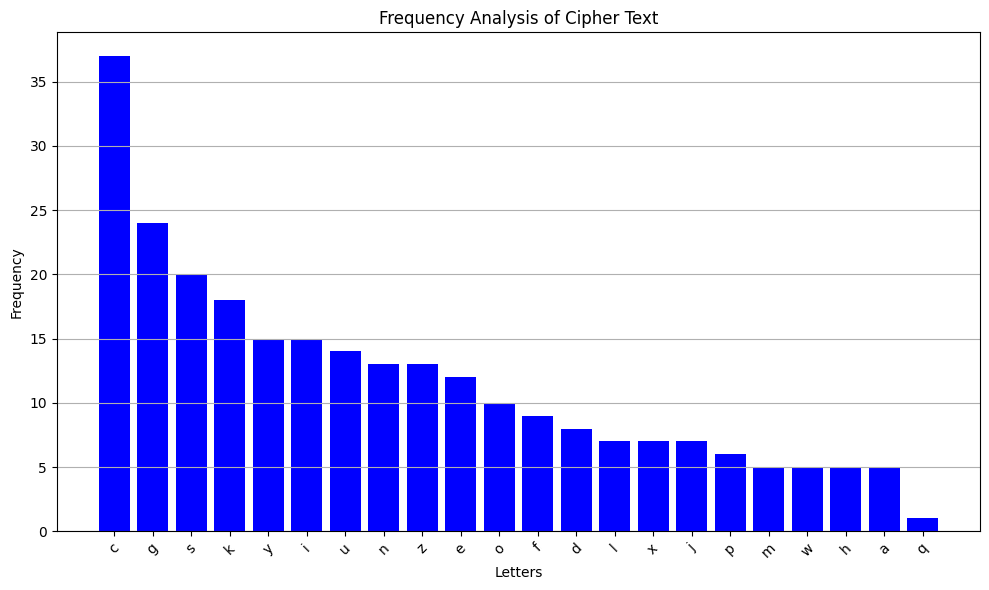

In [2]:
ciphertext = "EMGLOSUDCGDNCUSWYSFHNSFCYKDPUMLWGYICOXYSIPJCKQPKUGKMGOLICGINCGACKSNISACYKZSCKXECJCKSHYSXCGOIDPKZCNKSHICGIWYGKKGKGOLDSILKGOIUSIGLEDSPWZUGFZCCNDGYYSFUSZCNXEOJNCGYEOWEUPXEZGACGNFGLKNSACIGOIYCKXCJUCIUZCFZCCNDGYYSFEUEKUZCSOCFZCCNCIACZEJNCSHFZEJZEGMXCYHCJUMGKUCY"
frequency_analysis(ciphertext)

We are going to replace C with E

CMGLOSUDEGDNEUSWYSFHNSFEYKDPUMLWGYIEOXYSIPJEKQPKUGKMGOLIEGINEGAEKSNISAEYKZSEKXCEJEKSHYSXEGOIDPKZENKSHIEGIWYGKKGKGOLDSILKGOIUSIGLCDSPWZUGFZEENDGYYSFUSZENXCOJNEGYCOWCUPXCZGAEGNFGLKNSAEIGOIYEKXEJUEIUZEFZEENDGYYSFCUCKUZESOEFZEENEIAEZCJNESHFZCJZCGMXEYHEJUMGKUEY


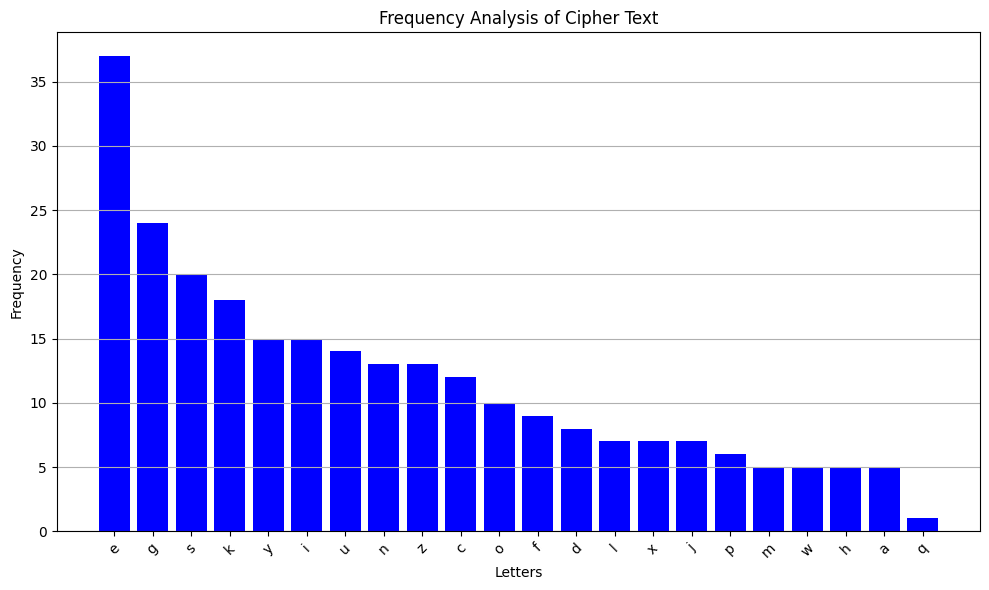

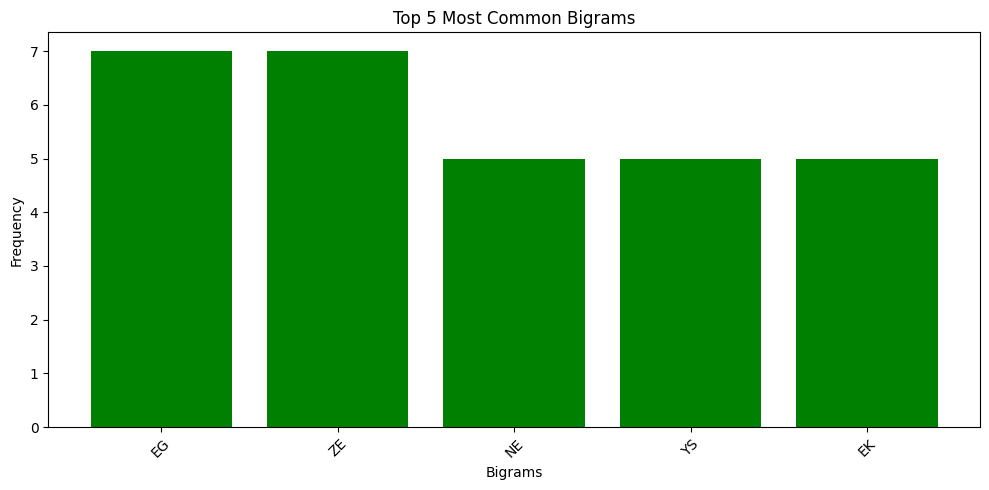

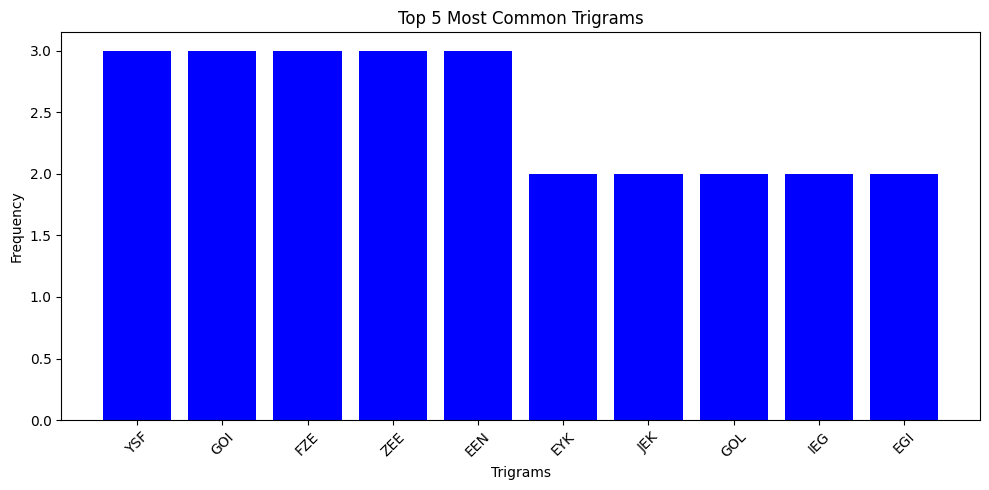

In [3]:
mapping = {'C': 'E', 'E': 'C'}
new_text = replace_letters(ciphertext, mapping)
print(new_text)

frequency_analysis(new_text)
bigram_frequency_analysis(new_text)
trigram_frequency_analysis(new_text)

Lookig at the trigram frequency, THE, AND, THA are the most common trigrams, we try to map them to YSF, GOI, FZE, ZEE, EEN.

**For THE**

* YSF: Y is not common enough to be a T
* GOI: Since we already replaced C with E, GOI does not end with e and cant be
* FZE: F is not common enough to be a T
* ZEE: The cant be this word
* ENN: The cant be this word.

**For AND**

* YSF: Y is not common enough to be an A
* GOI: G is common enough to be A.
* FZE: And cant be this word
* ZEE: And cant be this word
* ENN: And cant be this word

**For THA**

* YSF: Y is not common enough to be an T
* GOI: G is common enough to be T, I is not common enough to be an A.
* FZE: And cant be this word
* ZEE: And cant be this word
* ENN: And cant be this word

With this we can map GOI to AND and then AND to GOI and since E and A have been map, we can try to map S to T

CMALNTUIEAIOEUTWYTFHOTFEYKIPUMLWAYDENXYTDPJEKQPKUAKMANLDEADOEAGEKTODTGEYKZTEKXCEJEKTHYTXEANDIPKZEOKTHDEADWYAKKAKANLITDLKANDUTDALCITPWZUAFZEEOIAYYTFUTZEOXCNJOEAYCNWCUPXCZAGEAOFALKOTGEDANDYEKXEJUEDUZEFZEEOIAYYTFCUCKUZETNEFZEEOEDGEZCJOETHFZCJZCAMXEYHEJUMAKUEY


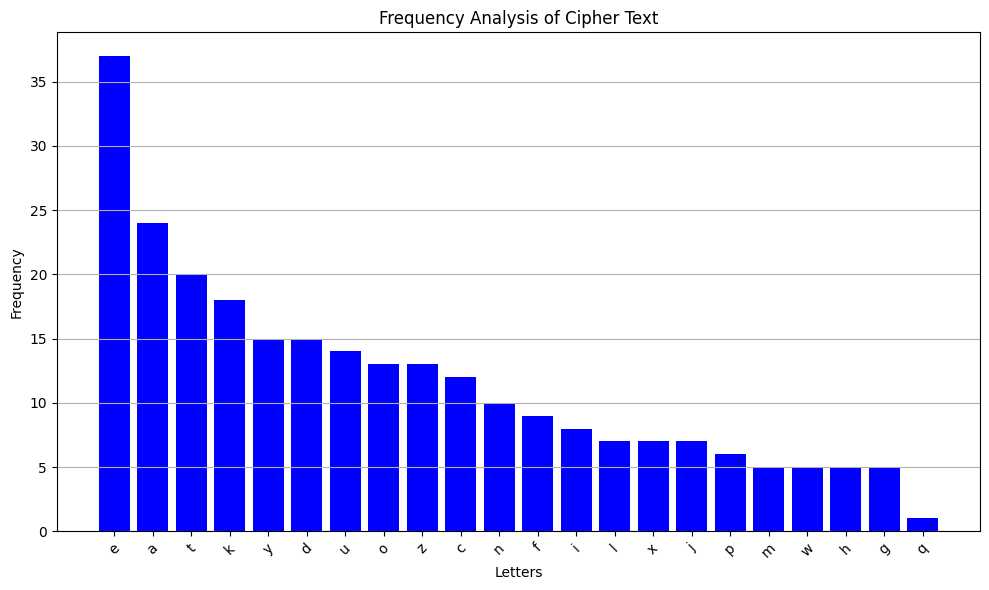

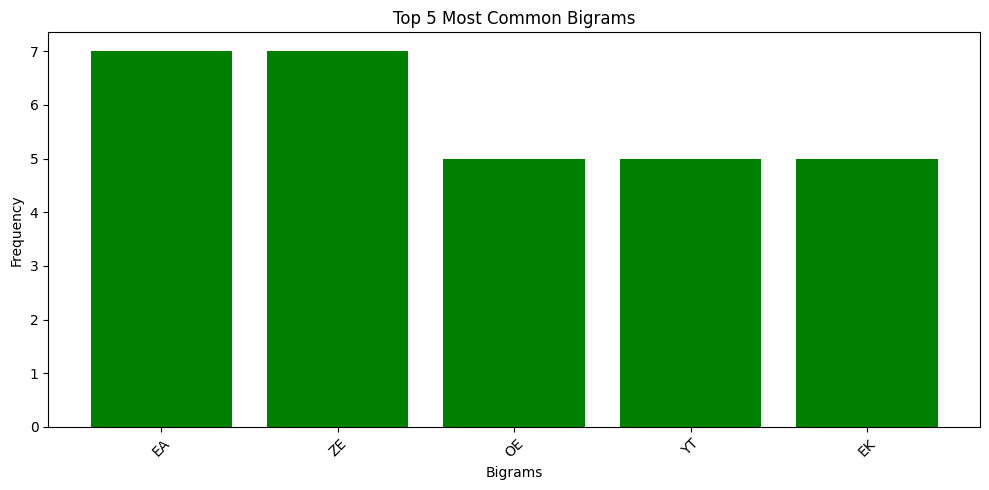

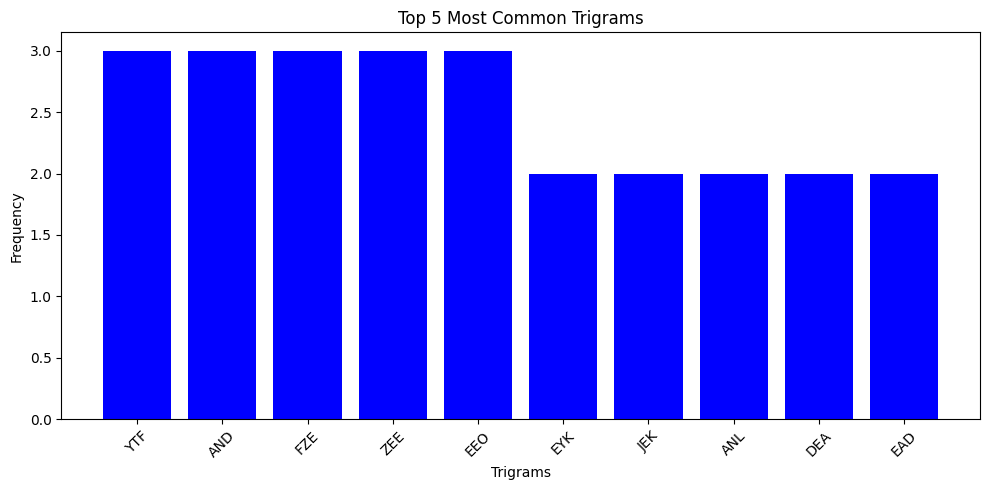

In [4]:
mapping = {'G': 'A', 'O': 'N', 'I': 'D', 'A': 'G', 'N': 'O', 'D': 'I', 'S': 'T', 'T': 'S'}
new_text_3 = replace_letters(new_text, mapping)
print(new_text_3)

frequency_analysis(new_text_3)
bigram_frequency_analysis(new_text_3)
trigram_frequency_analysis(new_text_3)

The most common bigrams are TH, HE, IN, ER, so we can try to map them to EA, ZE, OE, YT, EK

**For TH**

* EA: Cant be, E and A have been map already
* ZE: Cant be
* OE: Cant be
* YT: Cant be
* EK: Cant be

**For HE**

* EA: Cant be
* ZE: Z can be H
* OE: O can be H
* YT: Cant be
* EK: Cant be

**For IN**

* EA: Cant be
* ZE: Cant be
* OE: Cant be
* YT: Cant be
* EK: Cant be

**For ER**

* EA: Cant be
* ZE: Cant be
* OE: Cant be
* YT: Cant be
* EK: K can be R

We run a fitness function to evaluate with Z to H, O to H and K to R, we also try K to S since K is frequent enough to be map to S

In [6]:
mapping = {'Z': 'H', 'H': 'Z'}
option1 = replace_letters(new_text_3, mapping)
mapping = {'O': 'H', 'H': 'O'}
option2 = replace_letters(new_text_3, mapping)
mapping = {'K': 'R', 'R': 'K'}
option3 = replace_letters(new_text_3, mapping)
mapping = {'K': 'S', 'S': 'K'}
option4 = replace_letters(new_text_3, mapping)

# Example usage
score1 = fitness_score(option1)
print("Fitness Score:", score1)
score2 = fitness_score(option2)
print("Fitness Score:", score2)
score3 = fitness_score(option3)
print("Fitness Score:", score3)
score4 = fitness_score(option4)
print("Fitness Score:", score4)

Fitness Score: 14.675895009309727
Fitness Score: 16.17000451088299
Fitness Score: 13.361024547772324
Fitness Score: 13.174874813485957


The best fitness scores imply that Z maps to H and K to S, now we see if they get a better score together

In [7]:
mapping = {'K': 'S', 'S': 'K', 'Z': 'H', 'H': 'Z'}
option5 = replace_letters(new_text_3, mapping)

score3 = fitness_score(option3)
print("Fitness Score:", score3)
score4 = fitness_score(option4)
print("Fitness Score:", score4)
score5 = fitness_score(option5)
print("Fitness Score:", score5)

Fitness Score: 13.361024547772324
Fitness Score: 13.174874813485957
Fitness Score: 11.713001081033083


Since the fitness is lower, we do map it

CMALNTUIEAIOEUTWYTFZOTFEYSIPUMLWAYDENXYTDPJESQPSUASMANLDEADOEAGESTODTGEYSHTESXCEJESTZYTXEANDIPSHEOSTZDEADWYASSASANLITDLSANDUTDALCITPWHUAFHEEOIAYYTFUTHEOXCNJOEAYCNWCUPXCHAGEAOFALSOTGEDANDYESXEJUEDUHEFHEEOIAYYTFCUCSUHETNEFHEEOEDGEHCJOETZFHCJHCAMXEYZEJUMASUEY


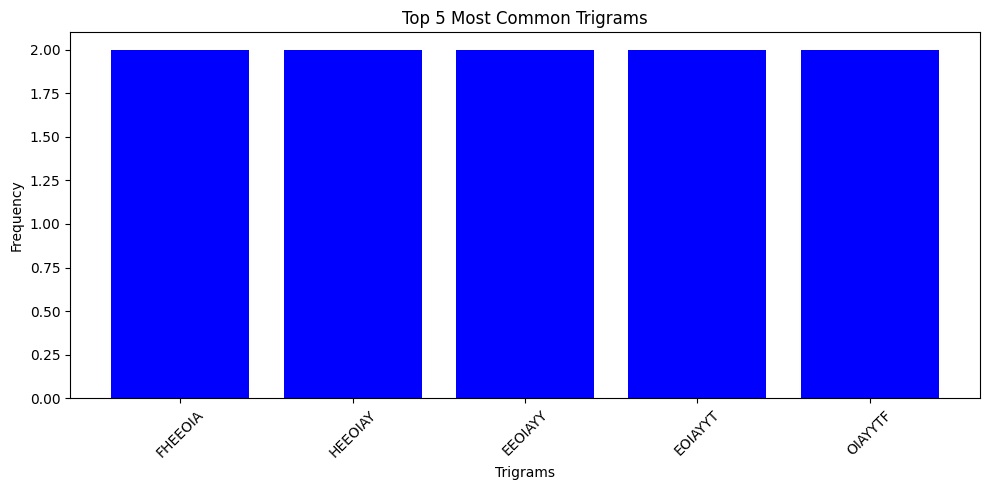

In [8]:
mapping = {'K': 'S', 'S': 'K', 'Z': 'H', 'H': 'Z'}
new_text_4 = replace_letters(new_text_3, mapping)
print(new_text_4)

seven_frequency_analysis(new_text_4)

Looking at a 7-letter word frequency analysis, we can see that the most common 7-letter words are just a big word, so we try a 11 letter analysis.

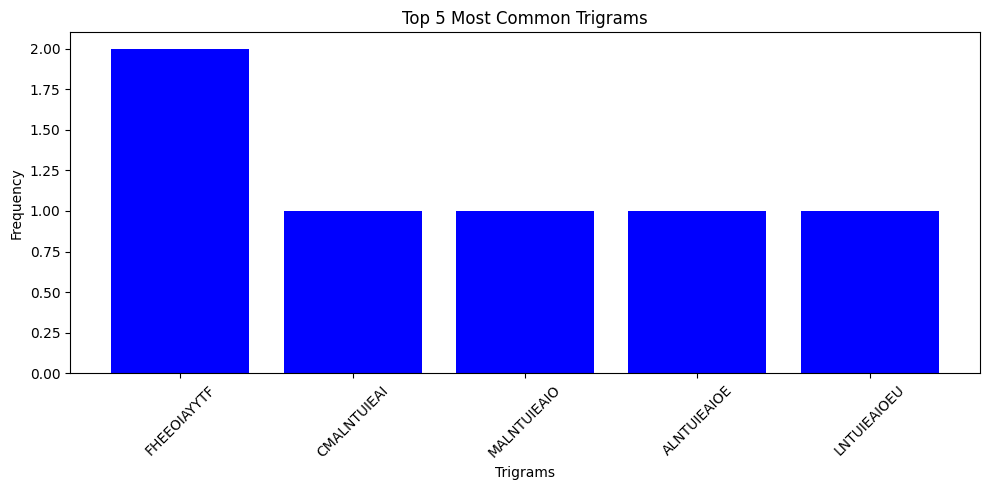

In [9]:
eleven_frequency_analysis(new_text_4)

Analyzing the word "FHEEOIAYYTF" we can try to guess the following:

* F needs to be a letter that goes after an H, it cant be a T since its been map already, it could be a W or a C
* Y is a letter that can be used twice, since it comes after an A, a vowel, it is not likely to be another vowel. It could be an L or R.

We try to map this and run a fitness function

In [10]:
dic = {'F': 'W', 'W': 'F'}
option6 = replace_letters(new_text_4, dic)
score = fitness_score(option6)
print("Fitness Score:", score)
dic = {'F': 'C', 'C': 'F'}
option6 = replace_letters(new_text_4, dic)
score = fitness_score(option6)
print("Fitness Score:", score)
dic = {'Y': 'L', 'L': 'Y'}
option6 = replace_letters(new_text_4, dic)
score = fitness_score(option6)
print("Fitness Score:", score)
dic = {'Y': 'R', 'R': 'Y'}
option6 = replace_letters(new_text_4, dic)
score = fitness_score(option6)
print("Fitness Score:", score)

Fitness Score: 11.695646383346334
Fitness Score: 11.767899422763698
Fitness Score: 11.149860731160823
Fitness Score: 9.445477514031413


F to W and Y to R are the best options, we now put the together and see if the fitness score improves

In [11]:
dic = {'Y': 'R', 'R': 'Y', 'F': 'W', 'W': 'F'}
option6 = replace_letters(new_text_4, dic)
score = fitness_score(option6)
print("Fitness Score:", score)

Fitness Score: 9.423947976727856


Its slightly better, so we still map it

CMALNTUIEAIOEUTFRTWZOTWERSIPUMLFARDENXRTDPJESQPSUASMANLDEADOEAGESTODTGERSHTESXCEJESTZRTXEANDIPSHEOSTZDEADFRASSASANLITDLSANDUTDALCITPFHUAWHEEOIARRTWUTHEOXCNJOEARCNFCUPXCHAGEAOWALSOTGEDANDRESXEJUEDUHEWHEEOIARRTWCUCSUHETNEWHEEOEDGEHCJOETZWHCJHCAMXERZEJUMASUER


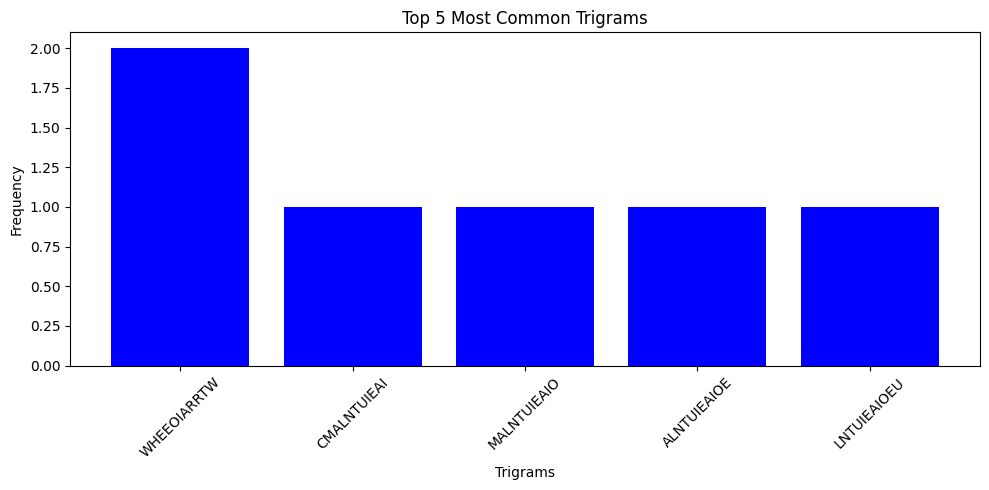

In [12]:
new_text_5 = replace_letters(new_text_4, dic)
print(new_text_5)

eleven_frequency_analysis(new_text_5)

Looking at the word WHEEOIARRTW we can guess the O being an L and getting the word WHEEL, since IARRTOW is next to WHEEL, and it repeats twice, its probably a word that begins with WHEEL, considering _ARR_W is the word, we can guess it to be WHEELBARROW and map I to B, and T to O

In [13]:
dic = {'O': 'L', 'I': 'B', 'T': 'O', 'B': 'I', 'L': 'T'}
new_text_6 = replace_letters(new_text_5, dic)
print(new_text_6)

CMATNOUBEABLEUOFROWZLOWERSBPUMTFARDENXRODPJESQPSUASMANTDEADLEAGESOLDOGERSHOESXCEJESOZROXEANDBPSHELSOZDEADFRASSASANTBODTSANDUODATCBOPFHUAWHEELBARROWUOHELXCNJLEARCNFCUPXCHAGEALWATSLOGEDANDRESXEJUEDUHEWHEELBARROWCUCSUHEONEWHEELEDGEHCJLEOZWHCJHCAMXERZEJUMASUER


Looking at an extract of the semi_cipher code, we have "BEABLEUOFROWZLOWERS", which can be separated to:

BE ABLE UOFROW ZLOWERS

Which means Z maps to F. From context, UOFROW probably separates in UO FROW, and U maps to T and F to G to create GROW, a common thing done to flowers.

In [14]:
dic = {'Z': 'F', 'F': 'G', 'U': 'T', 'T': 'U', 'G': 'Z'}
new_text_7 = replace_letters(new_text_6, dic)
print(new_text_7)

CMAUNOTBEABLETOGROWFLOWERSBPTMUGARDENXRODPJESQPSTASMANUDEADLEAZESOLDOZERSHOESXCEJESOFROXEANDBPSHELSOFDEADGRASSASANUBODUSANDTODAUCBOPGHTAWHEELBARROWTOHELXCNJLEARCNGCTPXCHAZEALWAUSLOZEDANDRESXEJTEDTHEWHEELBARROWCTCSTHEONEWHEELEDZEHCJLEOFWHCJHCAMXERFEJTMASTER


Looking at the tetx after "BE ABLE TO GROW FLOWERS" we have "BPTMUGARDEN", which can be separated to

BPTMU GARDEN

By context we can see U maps to Y to create MY, meaning BPT is its own word, the only words that fit, considering B and T have been map, are 

* BAT (Cant be since A has been mapped already)
* BET
* BIT
* BUT

From context, BUT is the most probable, so P maps to U

In [15]:
dic = {'U': 'Y', 'P': 'U', 'Y': 'P'}
new_text_8 = replace_letters(new_text_7, dic)
print(new_text_8)

CMAYNOTBEABLETOGROWFLOWERSBUTMYGARDENXRODUJESQUSTASMANYDEADLEAZESOLDOZERSHOESXCEJESOFROXEANDBUSHELSOFDEADGRASSASANYBODYSANDTODAYCBOUGHTAWHEELBARROWTOHELXCNJLEARCNGCTUXCHAZEALWAYSLOZEDANDRESXEJTEDTHEWHEELBARROWCTCSTHEONEWHEELEDZEHCJLEOFWHCJHCAMXERFEJTMASTER


Looking at "CMAYNOTBEABLE" we can see that C maps to I.

And, "QUSTASMANYDEADLEAZES" can be separated to

QUST AS MANY DEAD LEAZES

So Q maps to J, and from context of talking about garden and flowers, Z maps to V.

In [16]:
dic = {'Q': 'J', 'J': 'Q', 'Z': 'V', 'V': 'Z', 'C': 'I', 'I': 'C'}
new_text_9 = replace_letters(new_text_8, dic)
print(new_text_9)

IMAYNOTBEABLETOGROWFLOWERSBUTMYGARDENXRODUQESJUSTASMANYDEADLEAVESOLDOVERSHOESXIEQESOFROXEANDBUSHELSOFDEADGRASSASANYBODYSANDTODAYIBOUGHTAWHEELBARROWTOHELXINQLEARINGITUXIHAVEALWAYSLOVEDANDRESXEQTEDTHEWHEELBARROWITISTHEONEWHEELEDVEHIQLEOFWHIQHIAMXERFEQTMASTER


Looking at "IHAVEALWAYSLOVEDANDRESXEQTEDTHEWHEELBARROW" we separate them into

I HAVE ALWAYS LOVED AND RESXEQTED THE WHEELBARROW

Meaning X maps to P and Q to C.

In [17]:
dic = {'X': 'P', 'P': 'X', 'Q': 'C', 'C': 'Q'}
new_text_10 = replace_letters(new_text_9, dic)
print(new_text_10)

IMAYNOTBEABLETOGROWFLOWERSBUTMYGARDENPRODUCESJUSTASMANYDEADLEAVESOLDOVERSHOESPIECESOFROPEANDBUSHELSOFDEADGRASSASANYBODYSANDTODAYIBOUGHTAWHEELBARROWTOHELPINCLEARINGITUPIHAVEALWAYSLOVEDANDRESPECTEDTHEWHEELBARROWITISTHEONEWHEELEDVEHICLEOFWHICHIAMPERFECTMASTER


We have:

I MAY NOT BE ABLE TO GROW FLOWERS BUT MY GARDEN PRODUCES JUST AS MANY DEAD LEAVES OLD OVER SHOES PIECES OF ROPE AND BUSHELS OF DEAD GRASS AS ANYBODYS AND TODAY I BOUGHT A WHEELBARROW TO HELP IN CLEARING IT UP I HAVE ALWAYS LOVED AND RESPECTED THE WHEELBARROW IT IS THE ONE WHEELED VEHICLE OF WHICH I AM PERFECT MASTER

In [18]:
plaintext = new_text_10
key = generate_substitution_key(ciphertext, plaintext)

# Print the key (mapping between original and ciphertext)
print("\nSubstitution Key (Original -> Cipher):")
for p_char, c_char in key.items():
    print(f"{p_char} -> {c_char}")

Original Alphabet :  ACDEFGHIJKLMNOPQSUWXYZ
Cipher Alphabet   :  VEBIWAFDCSYMLNUJOTGPRH

Substitution Key (Original -> Cipher):
A -> V
C -> E
D -> B
E -> I
F -> W
G -> A
H -> F
I -> D
J -> C
K -> S
L -> Y
M -> M
N -> L
O -> N
P -> U
Q -> J
S -> O
U -> T
W -> G
X -> P
Y -> R
Z -> H


## Exercise 5.2
Vigenere Cipher:

KCCPKBGUFDPHQTYAVINRRTMVGRKDNBVFDETDGILTXRGUDDKOTFMBPVGEGLTGCKQRACQCWDNAWCRXIZAKFTLEWRPTYCQKYVXCHKFTPONCQQRHJVAJUWETMCMSPKQDYHJVDAHCTRLSVSKCGCZQQDZXGSFRLSWCWSJTBHAFSIASPRJAHKJRJUMVGKMITZHFPDISPZLVLGWTFPLKKEBDPGCEBSHCTJRWXBAFSPEZQNRWXCVYCGAONWDDKACKAWBBIKFTIOVKCGGHJVLNHIFFSQESVYCLACNVRWBBIREPBBVFEXOSCDYGZWPFDTKFQIYCWHJVLNHIQIBTKHJVNPIST

We know that the ciphertext corresponds to a Vigenere cipher. So we can start by determining the key length using the Friedman test, which relies on frequency analysis to estimate how likely it is that two random letters in the ciphertext match. This test gives us an approximation of the key length by calculating the match rate of the ciphertext and comparing it to the expected match rate of an English text.

Key Length 1: Avg IC: 0.0409
Key Length 2: Avg IC: 0.0428
Key Length 3: Avg IC: 0.0508
Key Length 4: Avg IC: 0.0417
Key Length 5: Avg IC: 0.0393
Key Length 6: Avg IC: 0.0628
Key Length 7: Avg IC: 0.0412
Key Length 8: Avg IC: 0.0410
Key Length 9: Avg IC: 0.0491


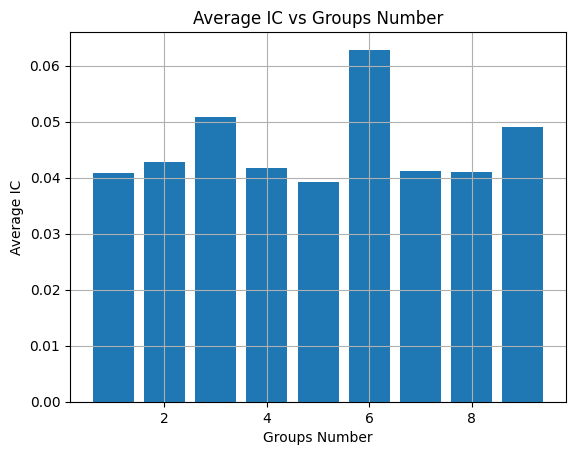

In [47]:
import matplotlib.pyplot as plt

# Friedman Test
def calculate_IC(text):
    Alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    counts = {char: 0 for char in Alphabet}
    numerator = 0
    denominator = len(text) * (len(text) - 1)
    for char in text:
        if char in Alphabet:
            counts[char] += 1
            
    for char in Alphabet:
        numerator += counts[char] * (counts[char] - 1)
    return numerator / denominator

# Divide the text into n groups
def divide_text(text, n):
    return [text[i::n] for i in range(n)]

text = 'KCCPKBGUFDPHQTYAVINRRTMVGRKDNBVFDETDGILTXRGUDDKOTFMBPVGEGLTGCKQRACQCWDNAWCRXIZAKFTLEWRPTYCQKYVXCHKFTPONCQQRHJVAJUWETMCMSPKQDYHJVDAHCTRLSVSKCGCZQQDZXGSFRLSWCWSJTBHAFSIASPRJAHKJRJUMVGKMITZHFPDISPZLVLGWTFPLKKEBDPGCEBSHCTJRWXBAFSPEZQNRWXCVYCGAONWDDKACKAWBBIKFTIOVKCGGHJVLNHIFFSQESVYCLACNVRWBBIREPBBVFEXOSCDYGZWPFDTKFQIYCWHJVLNHIQIBTKHJVNPIST'

num_groups = range(1, 10)
average_ICs = []

for i in num_groups:
    groups = divide_text(text, i)
    group_IC = {i: calculate_IC(group) for i, group in enumerate(groups)}
    average_IC = sum(group_IC.values()) / len(group_IC)
    average_ICs.append(average_IC)
    print(f'Key Length {i}: Avg IC: {average_IC:.4f}')

# Graficar los valores de average_IC vs número de grupos como un diagrama de barras
plt.bar(num_groups, average_ICs)
plt.xlabel('Groups Number')
plt.ylabel('Average IC')
plt.title('Average IC vs Groups Number')
plt.grid(True)
plt.show()

By looking the plot of the match rate, we can see that the most probable **key length is 6**. Then, we can divide the ciphertext into 6 groups and solve each group as a Caesar cipher. For that, we can use a fitness function to evaluate the quality of the decryption for each possible key letter. The fitness function is based on the frequency of the letters in the English language.

In this code, we will get the best two possible keys for each group that gives us the best fitness score.

Group: 1 : KGQNGVGGTGCQWAWQHNJEPJTKQFWAPJGHPWKCTAQVNCIVJFVNIVCPQJQJT
Best Keys: ('C', 'P')


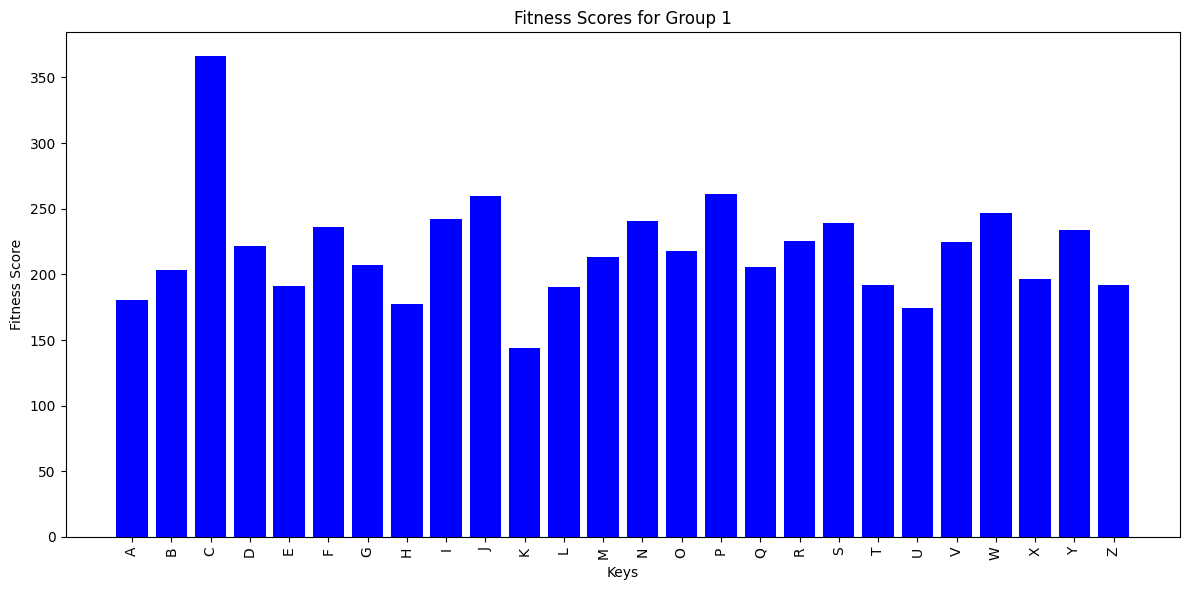

Group: 2 : CUTRRFIUFEKCCKRKKCVTKVRCDRSFRRKFZTEEJFNYWKKKVFYVRFDFIVIV
Best Keys: ('R', 'C')


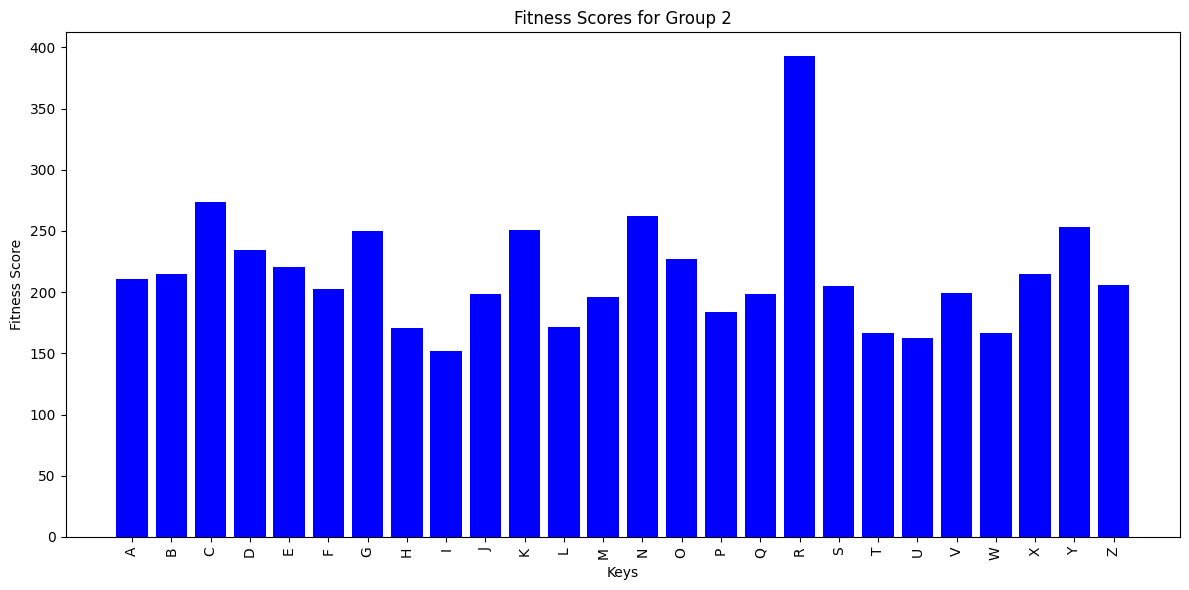

Group: 3 : CFYRKDLDMGQWRFPYFQAMQDLGZLJSJJMPLFBBRSRCDAFCLSCREEYDYLBN
Best Keys: ('Y', 'L')


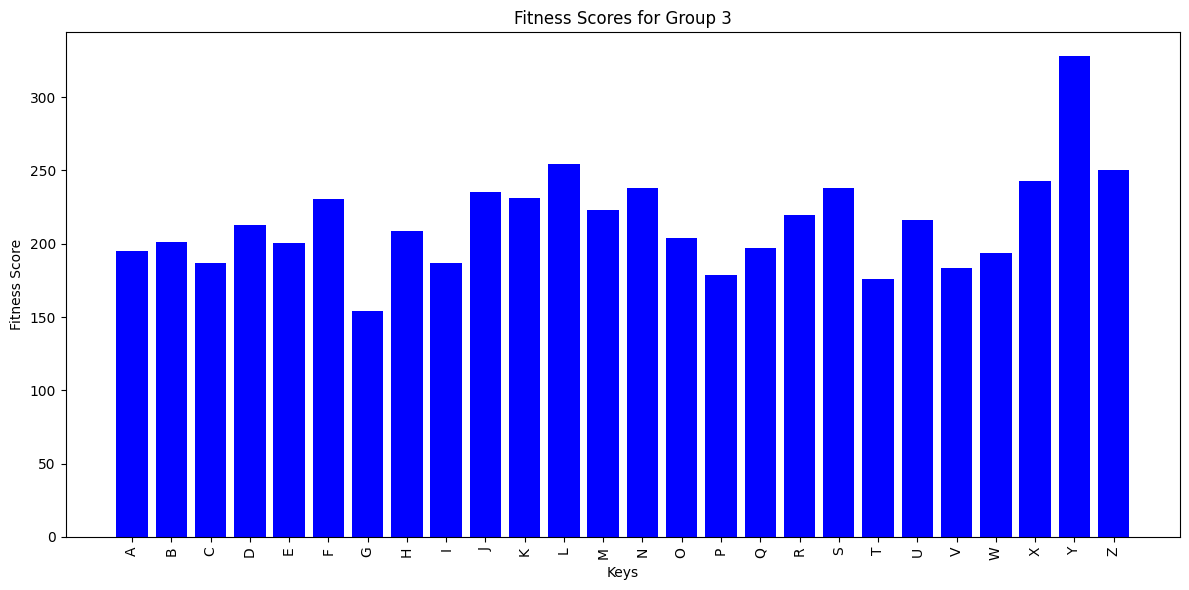

Group: 4 : PDATDETDBLRDXTTVTQJCDASCXSTIAUIDVPDSWPWGDWTGNQLWPXGTCNTP
Best Keys: ('P', 'L')


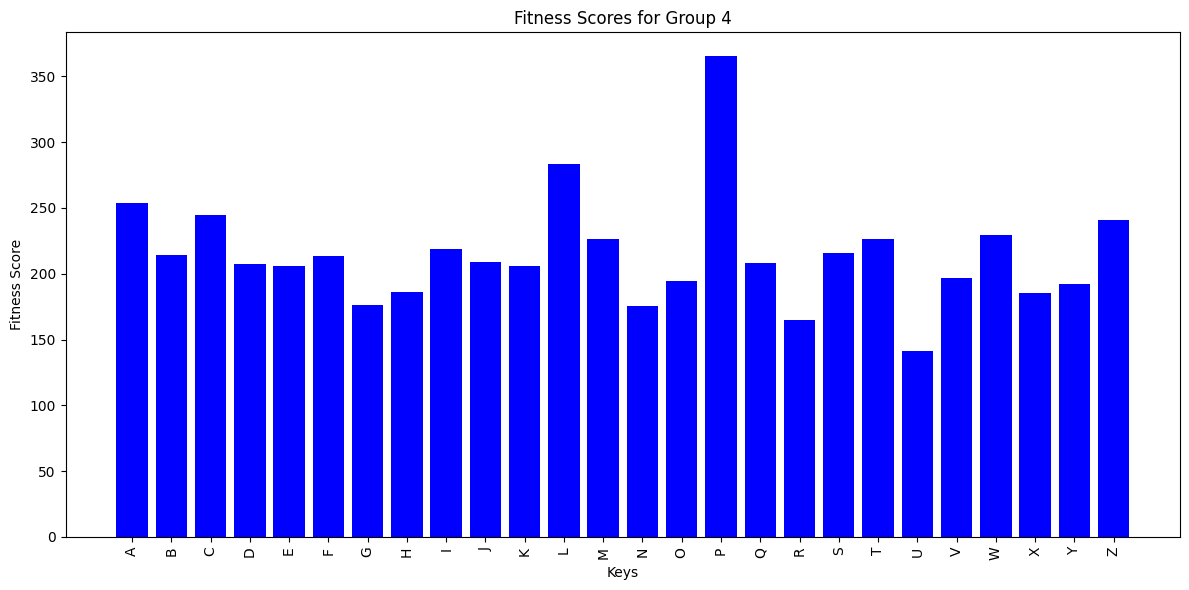

Group: 5 : KPVMNTXKPTANILYXPRUMYHVZGWBAHMTILLPHXEXAKBIGHEABBOZKWHKI
Best Keys: ('T', 'I')


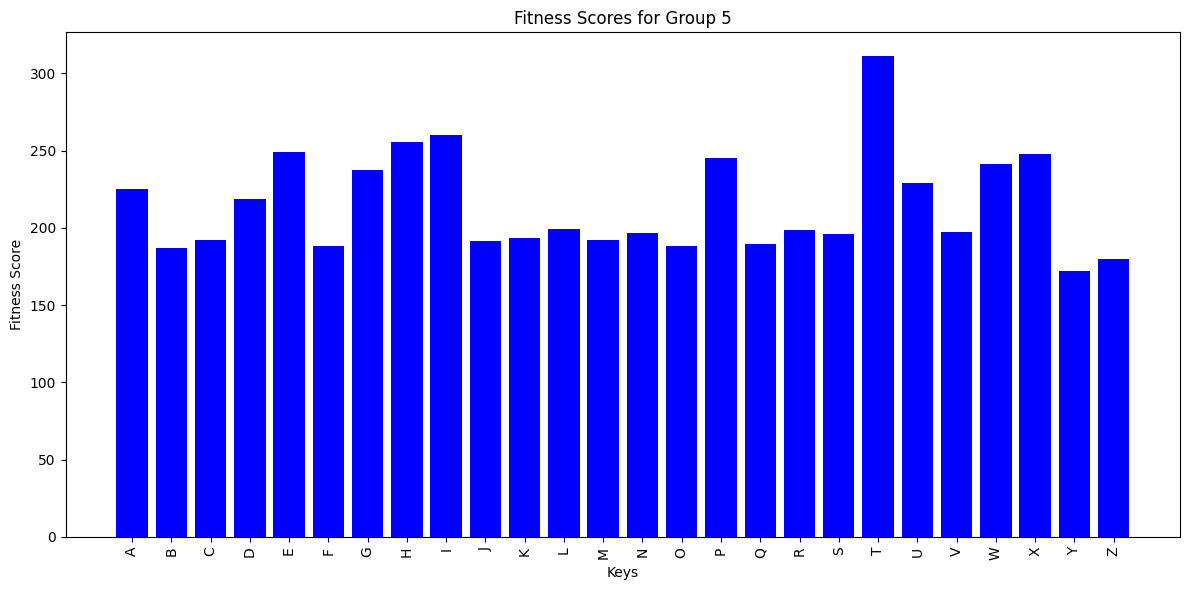

Group: 6 : BHIVBDROVGCAZECCOHWSHCSQSCHSKVZSGKGCBZCOABOHISCBBSWFHIHS
Best Keys: ('O', 'Z')


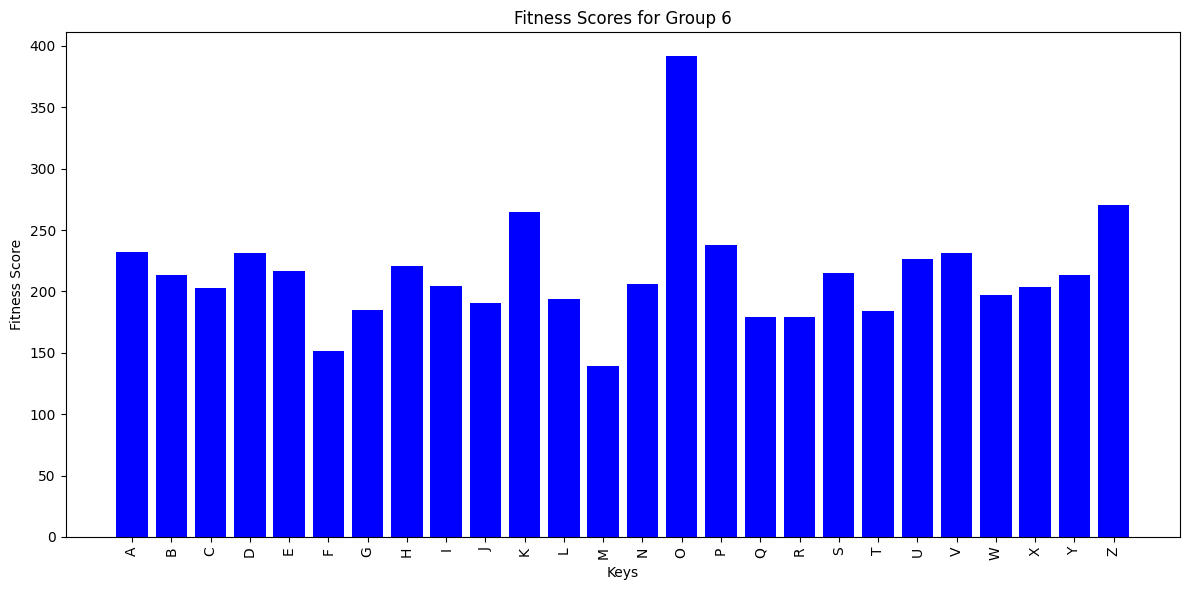

In [55]:
import matplotlib.pyplot as plt

# Variable to store the best keys for each group
stored_keys = {}

# Divide the ciphertext into groups
groups = divide_text(text, 6)

# Fitness function to calculate the score of a plaintext
def fitness(pt):
    english_frequencies = {
        'E': 12.02, 'T': 9.10, 'A': 8.12, 'O': 7.68,
        'I': 7.00, 'N': 6.95, 'S': 6.28, 'H': 6.09,
        'R': 5.99, 'D': 4.25, 'L': 4.03, 'C': 2.78,
        'U': 2.76, 'M': 2.41, 'W': 2.36, 'F': 2.23,
        'G': 2.02, 'Y': 1.97, 'P': 1.93, 'B': 1.49,
        'V': 0.98, 'K': 0.77, 'J': 0.15, 'X': 0.15,
        'Q': 0.10, 'Z': 0.07
    }
    
    score = 0
    for letter in pt:
        if letter in english_frequencies:
            score += english_frequencies[letter]
    return score

# Function to decrypt a Vigenere ciphertext
def decrypt_vigenere(ciphertext, key):
    plaintext = ''
    key_length = len(key)
    for i, char in enumerate(ciphertext):
        key_char = key[i % key_length]
        shift = ord(key_char) - ord('A')
        plaintext += chr((ord(char) - ord('A') - shift) % 26 + ord('A'))
    return plaintext

# Iterate over the groups and find the best key for each group
for i, group in enumerate(groups):
    keys = []
    scores = []
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for char in alphabet:
        key = char
        pt = decrypt_vigenere(group, key)
        fitness_score = fitness(pt)
        keys.append(f'{key}')
        scores.append(fitness_score)      
        
    print(f'Group: {i +1} : {group}')
    
    # Order the keys and scores in descending order
    sorted_keys_scores = sorted(zip(keys, scores), key=lambda x: x[1], reverse=True)
    sorted_keys, sorted_scores = zip(*sorted_keys_scores)
    
    # Store the 2 best keys for each group
    stored_keys[i + 1] = sorted_keys[:2]
    
    print(f'Best Keys: {stored_keys[i+1]}')
    
    # Plot the fitness scores for each key
    plt.figure(figsize=(12, 6))
    plt.bar(keys, scores, color='blue')
    plt.xlabel('Keys')
    plt.ylabel('Fitness Score')
    plt.title(f'Fitness Scores for Group {i+1}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

The best two keys obtained for each group are:

* Group 1: 'C' and 'P'
* Group 2: 'R' and 'C'
* Group 3: 'Y' and 'L'
* Group 4: 'P' and 'L'
* Group 5: 'T' and 'Y'
* Group 6: 'O' and 'Z'

Then, we can get all possible combinations of the keys (6^2) and decrypt the ciphertext using the Vigenere cipher. Finally, we can check the key that gives the decryption with the most fitness.

In [61]:
# Function to generate all possible keys
def generate_keys(stored_keys):
    keys = []
    for key1 in stored_keys[1]:
        for key2 in stored_keys[2]:
            for key3 in stored_keys[3]:
                for key4 in stored_keys[4]:
                    for key5 in stored_keys[5]:
                        for key6 in stored_keys[6]:
                            key = key1 + key2 + key3 + key4 + key5 + key6
                            keys.append(key)
    return keys

keys = generate_keys(stored_keys)

# Decrypt the text using the keys and print the fitness score
for key in keys:
    print(f'Key: {key} Fitness: {fitness(decrypt_vigenere(text, key)):.2f}')


Key: CRYPTO Fitness: 2154.05
Key: CRYPTZ Fitness: 2032.74
Key: CRYPIO Fitness: 2103.49
Key: CRYPIZ Fitness: 1982.18
Key: CRYLTO Fitness: 2071.92
Key: CRYLTZ Fitness: 1950.61
Key: CRYLIO Fitness: 2021.36
Key: CRYLIZ Fitness: 1900.05
Key: CRLPTO Fitness: 2080.35
Key: CRLPTZ Fitness: 1959.04
Key: CRLPIO Fitness: 2029.79
Key: CRLPIZ Fitness: 1908.48
Key: CRLLTO Fitness: 1998.22
Key: CRLLTZ Fitness: 1876.91
Key: CRLLIO Fitness: 1947.66
Key: CRLLIZ Fitness: 1826.35
Key: CCYPTO Fitness: 2034.86
Key: CCYPTZ Fitness: 1913.55
Key: CCYPIO Fitness: 1984.30
Key: CCYPIZ Fitness: 1862.99
Key: CCYLTO Fitness: 1952.73
Key: CCYLTZ Fitness: 1831.42
Key: CCYLIO Fitness: 1902.17
Key: CCYLIZ Fitness: 1780.86
Key: CCLPTO Fitness: 1961.16
Key: CCLPTZ Fitness: 1839.85
Key: CCLPIO Fitness: 1910.60
Key: CCLPIZ Fitness: 1789.29
Key: CCLLTO Fitness: 1879.03
Key: CCLLTZ Fitness: 1757.72
Key: CCLLIO Fitness: 1828.47
Key: CCLLIZ Fitness: 1707.16
Key: PRYPTO Fitness: 2049.59
Key: PRYPTZ Fitness: 1928.28
Key: PRYPIO Fi

Finally, the key with the best fitness is 'CRYPTO'. We use that key to decrypt the ciphertext and get the plaintext.

In [60]:
key = 'CRYPTO'
ciphertext = 'KCCPKBGUFDPHQTYAVINRRTMVGRKDNBVFDETDGILTXRGUDDKOTFMBPVGEGLTGCKQRACQCWDNAWCRXIZAKFTLEWRPTYCQKYVXCHKFTPONCQQRHJVAJUWETMCMSPKQDYHJVDAHCTRLSVSKCGCZQQDZXGSFRLSWCWSJTBHAFSIASPRJAHKJRJUMVGKMITZHFPDISPZLVLGWTFPLKKEBDPGCEBSHCTJRWXBAFSPEZQNRWXCVYCGAONWDDKACKAWBBIKFTIOVKCGGHJVLNHIFFSQESVYCLACNVRWBBIREPBBVFEXOSCDYGZWPFDTKFQIYCWHJVLNHIQIBTKHJVNPIST'
print(decrypt_vigenere(ciphertext, key))

ILEARNEDHOWTOCALCULATETHEAMOUNTOFPAPERNEEDEDFORAROOMWHENIWASATSCHOOLYOUMULTIPLYTHESQUAREFOOTAGEOFTHEWALLSBYTHECUBICCONTENTSOFTHEFLOORANDCEILINGCOMBINEDANDDOUBLEITYOUTHENALLOWHALFTHETOTALFOROPENINGSSUCHASWINDOWSANDDOORSTHENYOUALLOWTHEOTHERHALFFORMATCHINGTHEPATTERNTHENYOUDOUBLETHEWHOLETHINGAGAINTOGIVEAMARGINOFERRORANDTHENYOUORDERTHEPAPER


## Exercise 5.3
Affine Cipher:

KQEREJEBCPPCJCRKIEACUZBKRVPKRBCIBQCARBJCVFCUPKRIOFKPACUZQEPBKRXPEIIEABDKPBCPFCDCCAFIEABDKPBCPFEQPKAZBKRHAIBKAPCCIBURCCDKDCCJCIDFUIXPAFFERBICZDFKABICBBENEFCUPJCVKABPCYDCCDPKBCOCPERKIVKSCPICBRKIJPKABI

In [1]:
ciphertext = 'KQEREJEBCPPCJCRKIEACUZBKRVPKRBCIBQCARBJCVFCUPKRIOFKPACUZQEPBKRXPEIIEABDKPBCPFCDCCAFIEABDKPBCPFEQPKAZBKRHAIBKAPCCIBURCCDKDCCJCIDFUIXPAFFERBICZDFKABICBBENEFCUPJCVKABPCYDCCDPKBCOCPERKIVKSCPICBRKIJPKABI'

To break the cipher, we will use a brute force approach. Thus, we will try all the possible values of a (the multiplicative key), taking into account that a and m must be coprime. Also, we must take into account that the additive key will be in the range of 0 to 26.

In [2]:
# Function to find the gdc
def gdc(a, b):
  if b == 0:
    return a
  else:
    return gdc(b, a % b)

# Function to find the multiplicative modular inverse
def modular_inverse(a, m):
  if gdc(a, m) != 1:
    return None
  else:
    for x in range(1, m):
      if (a * x) % m == 1:
        return x

In [3]:
# Function to decrypt Affine Cipher given a and b
def decrypt_affine(ciphertext, a, b):
    plaintext = []
    # Convert to uppercase
    ciphertext = ciphertext.upper()
    # Iterate over the ciphertext
    for c in ciphertext:
        if c.isalpha():
            # Decrypt the letter
            decrypted_char = (modular_inverse(a, 26) * (ord(c) - ord('A') - b)) % 26
            plaintext.append(chr(decrypted_char + ord('A')))
        else:
            # Keep non-alphabetic characters unchanged
            plaintext.append(c)
    return ''.join(plaintext)

In [4]:
# Initialize a list of coprime numbers to 26
possible_a = []
for i in range(1, 27):
  if gdc(i, 26) == 1:
    possible_a.append(i)

In [5]:
# Possible b values will be in the range of 1 to 26
possible_b = list(range(1, 27))

Once we have the lists with all the possible values of a and b, we try all the possible combinations and score them. The frequency distribution was taken from: https://www3.nd.edu/~busiforc/handouts/cryptography/letterfrequencies.html

In [7]:
# Letter frequency distribution of the English alphabet
letter_frequencies = {
    'E': 11.1607, 'A': 8.4966, 'R': 7.5809, 'I': 7.5448, 'O': 7.1635, 'T': 6.9509,
    'N': 6.6544, 'S': 5.7351, 'L': 5.4893, 'C': 4.5388, 'U': 3.6308, 'D': 3.3844,
    'P': 3.1671, 'M': 3.0129, 'H': 3.0034, 'G': 2.4705, 'B': 2.0720, 'F': 1.8121,
    'Y': 1.7779, 'W': 1.2899, 'K': 1.1016, 'V': 1.0074, 'X': 0.2902, 'Z': 0.2722,
    'J': 0.1965, 'Q': 0.1962
}

# Score the possible plaintext
def score_plaintext(plaintext):
  score = 0
  frequencies = {}

  # Iterate over the letters and update frequencies
  for letter in plaintext:
    if letter in frequencies:
      frequencies[letter] += 1
    else:
      frequencies[letter] = 1

  # Iterate over the dictionary and compare frequencies
  for letter, count in frequencies.items():
    observed_frequency = count / len(plaintext) * 100
    expected_frequency = letter_frequencies.get(letter, 0)
    score += (observed_frequency - expected_frequency) ** 2

  # Return the negative score to rank the most simmilar distribution higher
  return -score

In [8]:
# Initialize possible plaintexts list
possible_plaintexts = []

# Try all the possible combinations
for a in possible_a:
  for b in possible_b:
    plaintext = decrypt_affine(ciphertext, a, b)
    possible_plaintexts.append((plaintext, score_plaintext(plaintext), a, b))

possible_plaintexts.sort(key=lambda x: x[1], reverse=True)

# Print the top 5 possible plaintexts
for i in range(5):
  print(f"Possible plaintext {i + 1}: {possible_plaintexts[i][0]}")
  print(f"Score: {possible_plaintexts[i][1]}")
  print(f"a: {possible_plaintexts[i][2]}")
  print(f"b: {possible_plaintexts[i][3]}")
  print()

Possible plaintext 1: OCANADATERREDENOSAIEUXTONFRONTESTCEINTDEFLEURONSGLORIEUXCARTONBRASSAITPORTERLEPEEILSAITPORTERLACROIXTONHISTOIREESTUNEEPOPEEDESPLUSBRILLANTSEXPLOITSETTAVALEURDEFOITREMPEEPROTEGERANOSFOYERSETNOSDROITS
Score: -93.51337165518926
a: 19
b: 4

Possible plaintext 2: AKQDQHQLERREHEDAOQSEIZLADBRADLEOLKESDLHEBJEIRADOYJARSEIZKQRLADNRQOOQSLXARLERJEXEESJOQSLXARLERJQKRASZLADVSOLASREEOLIDEEXAXEEHEOXJIONRSJJQDLOEZXJASLOELLQFQJEIRHEBASLREGXEEXRALEYERQDAOBAWEROELDAOHRASLO
Score: -214.21814931791658
a: 11
b: 10

Possible plaintext 3: SWOBONOZERRENEBSIOUEQPZSBVRSBZEIZWEUBZNEVTEQRSBIMTSRUEQPWORZSBFROIIOUZJSRZERTEJEEUTIOUZJSRZERTOWRSUPZSBDUIZSUREEIZQBEEJSJEENEIJTQIFRUTTOBZIEPJTSUZIEZZOHOTEQRNEVSUZREKJEEJRSZEMEROBSIVSGERIEZBSINRSUZI
Score: -252.34832850205794
a: 21
b: 22

Possible plaintext 4: JDPCPKPSREERKRCJLPTRZUSJCYEJCSRLSDRTCSKRYORZEJCLFOJETRZUDPESJCWEPLLPTSQJESREORQRRTOLPTSQJESREOPDEJTUSJCMTLSJTERRLSZCRRQJQRRKRLQOZLWETOOPCSLRUQOJTSLRSSPGPORZEKRYJTSERVQRRQEJSRFREPCJLYJBRELRSCJLKEJTS

Therefore, the keys are a=19, b=4

## Exercise 5.4
unspecified cipher:

BNVSNSIHQCEELSSKKYERIFJKXUMBGYKAMQLJTYAVFBKVTDVBPVVRJYYLAOKYMPQSCGDLFSRLLPROYGESEBUUALRWXMMASAZLGLEDFJBZAVVPXWICGJXASCBYEHOSNMULKCEAHTQOKMFLEBKFXLRRFDTZXCIWBJSICBGAWDVYDHAVFJXZIBKCGJIWEAHTTOEWTUHKRQVVRGZBXYIREMMASCSPBNLHJMBLRFFJELHWEYLWISTFVVYFJCMHYUYRUFSFMGESIGRLWALSWMNUHSIMYYITCCQPZSICEHBCCMZFEGVJYOCDEMMPGHVAAUMELCMOEHVLTIPSUYILVGFLMVWDVYDBTHFRAYISYSGKVSUUHYHGGCKTMBLRX

In [9]:
ciphertext = 'BNVSNSIHQCEELSSKKYERIFJKXUMBGYKAMQLJTYAVFBKVTDVBPVVRJYYLAOKYMPQSCGDLFSRLLPROYGESEBUUALRWXMMASAZLGLEDFJBZAVVPXWICGJXASCBYEHOSNMULKCEAHTQOKMFLEBKFXLRRFDTZXCIWBJSICBGAWDVYDHAVFJXZIBKCGJIWEAHTTOEWTUHKRQVVRGZBXYIREMMASCSPBNLHJMBLRFFJELHWEYLWISTFVVYFJCMHYUYRUFSFMGESIGRLWALSWMNUHSIMYYITCCQPZSICEHBCCMZFEGVJYOCDEMMPGHVAAUMELCMOEHVLTIPSUYILVGFLMVWDVYDBTHFRAYISYSGKVSUUHYHGGCKTMBLRX'

To identify the cipher method being used, we can calculate specific metrics on the ciphertext to make an educated guess about the encryption technique, and then attempt to break it accordingly.

First we will start with the index of coincidence of the ciphertext. In the case we have a monoalphabetic substitution cipher, we would expect to have an index of coincidence value similar to that of the English language (0.065).

In [10]:
# Function to compute the Index of Coincidence for a given text
def get_frequencies(text):
  frequencies = {}
  for letter in text:
    if letter in frequencies:
      frequencies[letter] += 1
    else:
      frequencies[letter] = 1
  return frequencies

def index_of_coincidence(text):
    n = len(text)
    if n <= 1:
        return 0
    frequency = get_frequencies(text)
    ic = sum(f * (f - 1) for f in frequency.values()) / (n * (n - 1))
    return ic

Now we will compute the index of coincidence of the ciphertext.

In [11]:
ciphertext_ic = index_of_coincidence(ciphertext)
print("Index of coincidence of the ciphertext: ", ciphertext_ic)

Index of coincidence of the ciphertext:  0.04138199429213872


Considering that a random string will have an index of coincidence of a value around 0.038, we can assume that the cipher technique being used is not a monoalphabetic substitution.

Now, we can check for polyalphabetic substitution. For this, we can compute the index of coincidence at the end of each nth letter. If a polyalphabetic substitution method is in use, the index of coincide will increase around n being the length of the  key.

In [12]:
# Function to break the ciphertext in n groups
def get_groups(ciphertext, n):
  groups = []
  for i in range(n):
    groups.append(ciphertext[i::n])
  return groups

# Calculate the average ic for a given key length
def get_ic_for_key_length(ciphertext, key_length):
  groups = get_groups(ciphertext, key_length)
  ic = []
  for group in groups:
    ic.append(index_of_coincidence(group))
  return sum(ic) / len(ic)

We will compute the ic for key lengths in the range from 2 to 10 to check if this is a polyalphabetic substitution cipher.

In [13]:
for i in range(2, 11):
  ic = get_ic_for_key_length(ciphertext, i)
  print(f"Index of coincidence for key length {i}: {ic}")

Index of coincidence for key length 2: 0.045270386826364056
Index of coincidence for key length 3: 0.04683591223009004
Index of coincidence for key length 4: 0.04855992559657028
Index of coincidence for key length 5: 0.041509564358879425
Index of coincidence for key length 6: 0.060622721384223234
Index of coincidence for key length 7: 0.041832730511975794
Index of coincidence for key length 8: 0.051274540034947066
Index of coincidence for key length 9: 0.044450896889921286
Index of coincidence for key length 10: 0.046269954164691006


Since the value of the index of coincidence for key length 6 is similar to that of an English language string, we can try for a polyalphabetic substitution cipher, in this case, Vigenere Cipher.

We will start by performing Kasiski Anlaysis.

In [14]:
# Check for repeating sequences of length in the range 3 to 10
def kasiski_analysis(ciphertext, length_range):
    # Initialize dictionary
    sequences = {}
    # Try different repeating string lengths
    for length in range(3, length_range + 1):
        # Iterate over the ciphertext with a step of 1 to avoid skipping
        for i in range(0, len(ciphertext) - length + 1):
            # Get the sequence
            sequence = ciphertext[i:i+length]
            # Check if the sequence is in the dictionary
            if sequence not in sequences:
                sequences[sequence] = []
            # Append the index
            sequences[sequence].append(i)
    return sequences

# Function to get a list of common factors to a list of numbers
def get_factors_of_list(numbers):
  factors = []
  for number in numbers:
    for i in range(2, 25):
      if number % i == 0:
        factors.append(i)

  return list(set(factors))

# Get a dictionary of the repreated sequences and the factors below 25 of their distances
def get_factors(sequences):
  # Initialize dictionary
  factors = {}
  # Iterate over the sequences
  for sequence, indices in sequences.items():
    if len(indices) > 1:
      distances = []
      # Iterate over the indices
      for i in range(len(indices) - 1):
        # Get the distance
        distance = indices[i + 1] - indices[i]
        # Append the distance
        distances.append(distance)
      # Get the factors
      factors[sequence] = get_factors_of_list(distances)
  return factors

In [15]:
common_sequences = kasiski_analysis(ciphertext, 5)
factors = get_factors(common_sequences)

Since Kasiski analysis will tell us the factors of the distances between repeating strings, we can check the most common factors from the repeating strings to get the possible length of the key.

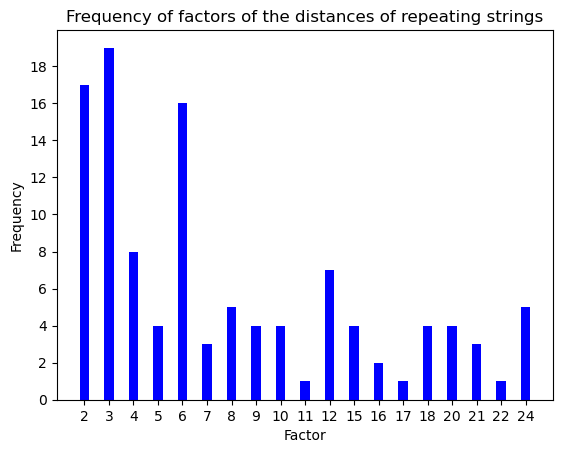

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Initialize a dictionary with the numbers of 2 to 25 to count frequencies
factors_count = {i: 0 for i in range(2, 26)}

# Iterate over the factors
for sequence, factor_list in factors.items():
  for factor in factor_list:
    factors_count[factor] += 1

# Create lists to store the data
factors = list(factors_count.keys())
counts = list(factors_count.values())

# Remove positions where the value is 0
factors = [str(factor) for factor, count in zip(factors, counts) if count != 0]
counts = [count for count in counts if count != 0]

# Initialize the bar plot
plt.bar(factors, counts, color='blue', width=0.4)
plt.xlabel("Factor")
plt.ylabel("Frequency")
plt.title("Frequency of factors of the distances of repeating strings")

# Ensure that the y-axis contains only integers
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

By analyzing the plot, it is evident that the most likely key is either 3 or 6, given that a key of length 2 is very unlikely, the remaining options are 3 and 6.

In the previous step, we computed the index of coincidence for various key lengths. According to Stinson and Paterson's Cryptography Theory and Practice, the expected index for English text is 0.065. Based on our calculations and the Kasiski examination, we can confidently conclude that the key length is 6.

Now, with the known key length, we can solve the cipher by grouping the ciphertext into 6 columns, applying frequency analysis on each of them. By doing this, we can get the actual key.

In [17]:
import string

# Frequency distribution of letters in English
letter_frequencies = {
    'A': 8.167, 'B': 1.492, 'C': 2.782, 'D': 4.253, 'E': 12.702, 'F': 2.228,
    'G': 2.015, 'H': 6.094, 'I': 6.966, 'J': 0.153, 'K': 0.772, 'L': 4.025,
    'M': 2.406, 'N': 6.749, 'O': 7.507, 'P': 1.929, 'Q': 0.095, 'R': 5.987,
    'S': 6.327, 'T': 9.056, 'U': 2.758, 'V': 0.978, 'W': 2.360, 'X': 0.150,
    'Y': 1.974, 'Z': 0.074
}

# Your score_plaintext function
def score_plaintext(plaintext):
    score = 0
    frequencies = {}

    # Iterate over the letters and update frequencies
    for letter in plaintext:
        if letter in frequencies:
            frequencies[letter] += 1
        else:
            frequencies[letter] = 1

    # Iterate over the dictionary and compare frequencies
    for letter, count in frequencies.items():
        observed_frequency = count / len(plaintext) * 100
        expected_frequency = letter_frequencies.get(letter, 0)
        score += (observed_frequency - expected_frequency) ** 2

    # Return the negative score to rank the most similar distribution higher
    return -score

# Vigenère cipher decryption function
def vigenere_decrypt(ciphertext, key):
    decrypted_text = []
    key_len = len(key)
    alphabet = string.ascii_uppercase

    for i, char in enumerate(ciphertext):
        if char in alphabet:
            char_index = alphabet.index(char)
            key_char = key[i % key_len]
            key_index = alphabet.index(key_char)
            decrypted_char = alphabet[(char_index - key_index) % 26]
            decrypted_text.append(decrypted_char)
        else:
            decrypted_text.append(char)  # Non-alphabet characters remain unchanged

    return ''.join(decrypted_text)

# Function to break Vigenère cipher given the key length
def break_vigenere(ciphertext, key_length):
    alphabet = string.ascii_uppercase
    best_key = None
    best_score = float('-inf')

    # Try all possible keys by brute force on each position of the key
    def try_key(key_chars):
        key = ''.join(key_chars)
        decrypted = vigenere_decrypt(ciphertext, key)
        return score_plaintext(decrypted)

    # Iterate over all key positions
    key_chars = ['A'] * key_length
    for i in range(key_length):
        best_char_for_position = 'A'
        best_score_for_position = float('-inf')

        # Test all letters A-Z for this key position
        for letter in alphabet:
            key_chars[i] = letter
            score = try_key(key_chars)
            if score > best_score_for_position:
                best_score_for_position = score
                best_char_for_position = letter

        key_chars[i] = best_char_for_position  # Fix the best letter for this position

    return ''.join(key_chars)

# Finding the best key and decrypting
best_key = break_vigenere(ciphertext, 6)
decrypted_message = vigenere_decrypt(ciphertext, best_key)

print("Best key:", best_key)
print("Decrypted message:", decrypted_message)


Best key: THEORY
Decrypted message: IGREWUPAMONGSLOWTALKERSMENINPARTICULARWHODROPPEDWORDSAFEWATATIMELIKEBEANSINAHILLANDWHENIGOTTOMINNEAPOLISWHEREPEOPLETOOKALAKEWOBEGONCOMMATOMEANTHEENDOFASTORYICOULDNTSPEAKAWHOLESENTENCEINCOMPANYANDWASCONSIDEREDNOTTOOBRIGHTSOIENROLLEDINASPEECHCOURSETAUGHTBYORVILLESANDTHEFOUNDEROFREFLEXIVERELAXOLOGYASELFHYPNOTICTECHNIQUETHATENABLEDAPERSONTOSPEAKUPTOTHREEHUNDREDWORDSPERMINUTE
